# salt result viz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
import matplotlib.pyplot as plt
# import seaborn as sns
# from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

In [2]:
sys.path.insert(1, 'D:/spark-brc_gits/apexmf_git')

In [3]:
from apexmf import apexmf_pst_par, apexmf_utils
from apexmf import apexmf_pst_viz, apexmf_pst_utils
from apexmf.salt.analyzer import SaltAnalysis
from apexmf import analyzer

D:\spark-brc_gits/apexmf_git\apexmf\analyzer.py:260: DeprecationWarning: invalid escape sequence '\l'


# Set Path

In [4]:
cwd = "D:/Projects/BLM/reports/report_230831_final"

In [5]:
ani_wd = "D:/Projects/Watersheds/Animas/Analysis/AMRSs/calibration/main_ies_1_pp_rw_ies_init_zero"

In [6]:
# ani_wd = "D:\Projects\Watersheds\Animas\Analysis\AMRSs\calibration\main_ies_1_pp_rw_ies_init_zero"
price_wd = "D:/Projects/Watersheds/Price/AMRSs/4 APEX-MODFLOW-Salt Final"
white_wd = "D:/Projects/Watersheds/White/Analysis/AMRSs/APEX-MODFLOW-Salt_wr"
ug_wd = "D:/Projects/Watersheds/Green/Analysis/AMRSs/salt_cal_230117/gr_012721/main_ies_1_pp_rw_ies"
dol_wd = "D:/Projects/Watersheds/Dolores/Analysis/AMRSs/main_ies_1_pp_rw_ies"
gu_wd = "D:/Projects/Watersheds/Gunnison/Analysis/AMRSs/main_ies_rw"

sub_ids = [75, 163, 66, 199, 1, 64]
rch_fnams = [f"SITE{sub_id}.RCH" for sub_id in sub_ids]
obd_col_nams = ["str_075", "sub_163", "sub066", "sub199", "sub001", "sub0064"]

tot_wds = [ani_wd, price_wd, white_wd, ug_wd, dol_wd, gu_wd]
st_dates = ["1/1/1987", "1/1/1990", "1/1/1985", "1/1/1995", "1/1/1987", "1/1/2007"]
cal_st_dates = ["1/1/1992", "1/1/1995", "1/1/1990", "1/1/2000", "1/1/1992", "1/1/2009"]
cal_ed_dates = ["12/31/2011", "12/31/2015", "12/31/2019", "12/31/2019", "12/31/2011", "12/31/2015"]
names = ['Animas', 'Price', 'White', 'Upper Green','Dolores', 'Gunnison']

# os.chdir(wd)

# Groundwater

In [4]:
gwd = "D:/Projects/BLM/reports/report_230831_final"

In [5]:
os.chdir(gwd)

In [6]:
gw_df = pd.read_excel("tot_gw.xlsx",
            usecols=["Measured", "Modelled", "ws"],
            )

In [7]:
gw_df

,Measured,Modelled,ws
0,-31.09,-27.960000,Animas
1,-30.30,-28.000000,Animas
2,-30.14,-28.030000,Animas
3,-29.92,-28.080000,Animas
4,-30.37,-28.130000,Animas
...,...,...,...
6587,-16.80,-6.768066,Price
6588,-11.90,-6.768066,Price
6589,-19.80,-6.843896,Price
6590,-12.80,-6.843896,Price


In [8]:
gw_df.rename(columns={'Measured': 'obd', 'Modelled': 'sim', 'ws':'type'}, inplace=True)

In [9]:
from apexmf import analyzer

D:\spark-brc_gits/apexmf_git\apexmf\analyzer.py:253: DeprecationWarning: invalid escape sequence '\l'


In [10]:
gw_df.rename(columns={'obd': 'obd', 'Modelled': 'sim', 'ws':'type'}, inplace=True)

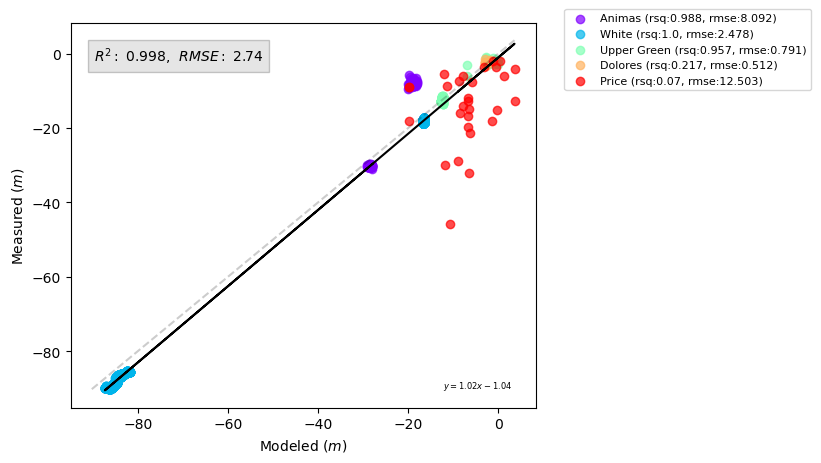

In [11]:
analyzer.plot_one_one(gw_df)

# salt

## Ani

In [7]:
md = SaltAnalysis(tot_wds[0])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df, st_dates[0], cal_st_dates[0])
tot_salt_df = tot_salt_df.resample('M').mean()


In [8]:
salt_obd = pd.read_csv('salt_075_mon.obd', sep='\t', index_col=0, parse_dates=True)
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

In [9]:
ani_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
ani_sim_obd["type"] = "Animas"

In [23]:
ani_sim_obd

,tot_salt_loads,tot_salt_obd,type
1992-01-31,192387.031213,366897.0,Animas
1992-03-31,273260.567640,515820.0,Animas
1992-05-31,236583.118034,1064525.0,Animas
1992-08-31,187478.309092,539797.0,Animas
1992-11-30,187494.579566,420574.0,Animas
...,...,...,...
2009-06-30,523967.970317,820238.0,Animas
2009-12-31,381382.398972,373176.0,Animas
2010-05-31,690665.831471,924526.0,Animas
2010-07-31,463369.774444,371537.0,Animas


## Upper Green

In [10]:
md = SaltAnalysis(tot_wds[3])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df, st_dates[3], cal_st_dates[3])
tot_salt_df = tot_salt_df.resample('M').mean()


In [11]:
salt_obd = pd.read_csv('salt_199_mon.obd.csv', index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -8:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)
salt_obd

,tot_salt_obd
date,
1995-01-31,507557.0
1995-02-28,NaN
1995-03-31,700940.0
1995-04-30,NaN
1995-05-31,999191.0
...,...
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN


In [12]:
ug_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
ug_sim_obd["type"] = "Upper Green"

In [13]:
ug_sim_obd

,tot_salt_loads,tot_salt_obd,type
2000-01-31,4.447377e+05,643790.0,Upper Green
2000-03-31,3.706569e+05,888607.0,Upper Green
2000-05-31,8.026937e+05,735956.0,Upper Green
2000-07-31,1.882706e+06,511676.0,Upper Green
2000-09-30,1.331920e+06,435708.0,Upper Green
...,...,...,...
2018-05-31,1.714847e+06,1453094.0,Upper Green
2018-06-30,1.684488e+06,1461708.0,Upper Green
2018-07-31,1.354151e+06,578386.0,Upper Green
2018-08-31,9.077023e+05,459668.0,Upper Green


## Dolores

In [14]:
tot_salt_df

,tot_salt_loads
2000-01-31,444737.699113
2000-02-29,367934.222382
2000-03-31,370656.925162
2000-04-30,410451.026710
2000-05-31,802693.664907
...,...
2019-08-31,870447.175308
2019-09-30,837666.096093
2019-10-31,976888.937522
2019-11-30,589225.606689


In [15]:
md = SaltAnalysis(tot_wds[4])
df = md.load_salt_cha_result()
tot_salt_df = md.read_salt_sim_cha(df, 38, st_dates[4], cal_st_dates[4])
tot_salt_df = tot_salt_df.iloc[:, :8].resample('M').mean()
tot_salt_df["tot_salt_loads"] = tot_salt_df.sum(axis=1)
tot_salt_df.drop(tot_salt_df.iloc[:, :-1], inplace=True, axis=1)

salt_obd = pd.read_csv('salt_038_mon.obd', sep="\t", index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -8:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)
salt_obd

,tot_salt_obd
date,
1992-01-31,643070.0
1992-02-29,NaN
1992-03-31,691400.0
1992-04-30,400971.0
1992-05-31,662120.0
...,...
2022-07-31,NaN
2022-08-31,NaN
2022-09-30,NaN


In [16]:
dol_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
dol_sim_obd["type"] = "Dolores"

## Gunnision

In [17]:
md = SaltAnalysis(tot_wds[5])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df,st_dates[5], cal_st_dates[5])
tot_salt_df = tot_salt_df.resample('M').mean()

salt_obd = pd.read_csv('salt_064_mon.obd', sep="\t", index_col=0, parse_dates=True, na_values=-999)
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)
salt_obd

,tot_salt_obd
date,
2009-07-31,2229879
2009-08-31,1854327
2009-09-30,1616960
2009-10-31,1621585
2009-11-30,1483978
...,...
2017-08-31,1810125
2017-09-30,1852730
2017-10-31,1820393


In [18]:
gn_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
gn_sim_obd["type"] = "Gunnison"

<Axes: xlabel='tot_salt_loads', ylabel='tot_salt_obd'>

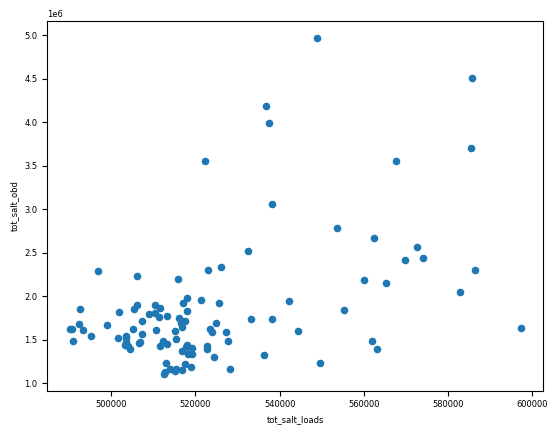

In [19]:
gn_sim_obd.plot(kind="scatter", x="tot_salt_loads", y="tot_salt_obd")

In [20]:
tot_salt = pd.concat([ani_sim_obd, ug_sim_obd, dol_sim_obd, gn_sim_obd], axis=0)

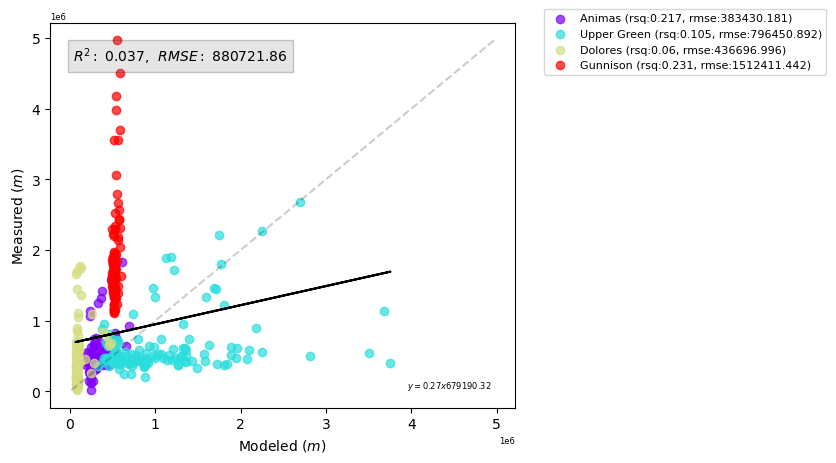

In [22]:
analyzer.plot_one_one(tot_salt, simnam="tot_salt_loads", obdnam="tot_salt_obd")

<Axes: xlabel='tot_salt_loads', ylabel='tot_salt_obd'>

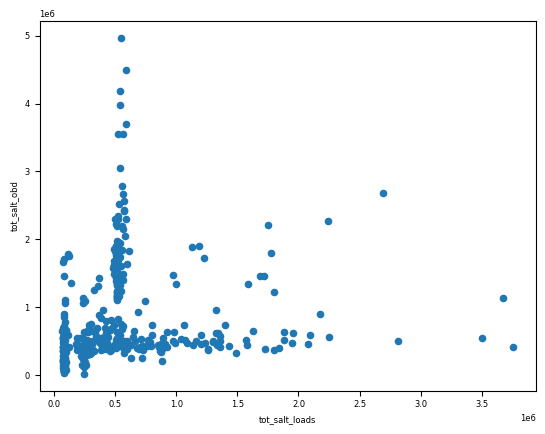

In [100]:
tot_salt.plot(kind="scatter", x="tot_salt_loads", y="tot_salt_obd")

In [ ]:
os